<a href="https://colab.research.google.com/github/Insulin-bangkit-2022/deeplearningmethod/blob/main/Capstone_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from google.colab import files
from keras.models import load_model
import numpy as np
%matplotlib inline

In [ ]:
files.upload()

Saving diabetes_data.csv to diabetes_data.csv


{'diabetes_data.csv': b'age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class\r\n40;Male;0;1;0;1;0;0;0;1;0;1;0;1;1;1;1\r\n58;Male;0;0;0;1;0;0;1;0;0;0;1;0;1;0;1\r\n41;Male;1;0;0;1;1;0;0;1;0;1;0;1;1;0;1\r\n45;Male;0;0;1;1;1;1;0;1;0;1;0;0;0;0;1\r\n60;Male;1;1;1;1;1;0;1;1;1;1;1;1;1;1;1\r\n55;Male;1;1;0;1;1;0;1;1;0;1;0;1;1;1;1\r\n57;Male;1;1;0;1;1;1;0;0;0;1;1;0;0;0;1\r\n66;Male;1;1;1;1;0;0;1;1;1;0;1;1;0;0;1\r\n67;Male;1;1;0;1;1;1;0;1;1;0;1;1;0;1;1\r\n70;Male;0;1;1;1;1;0;1;1;1;0;0;0;1;0;1\r\n44;Male;1;1;0;1;0;1;0;0;1;1;0;1;1;0;1\r\n38;Male;1;1;0;0;1;1;0;1;0;1;0;1;0;0;1\r\n35;Male;1;0;0;0;1;1;0;0;1;1;0;0;1;0;1\r\n61;Male;1;1;1;1;1;1;1;1;0;0;0;0;1;1;1\r\n60;Male;1;1;0;1;1;0;1;1;0;1;1;0;0;0;1\r\n58;Male;1;1;0;1;1;0;0;0;0;1;1;1;0;0;1\r\n54;Male;1;1;1;1;0;1;0;0;0;1;0;1;0;0;1\r\n67;Male;0;1;0;1;1;0;1;0;1;1;1;1;1;1;1\r\n66;Male;1;1;0;1;1;0;1;0;0;0;1;1;0;0;1\r\n

In [4]:
! pip install kaggle

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/Shared drives/Capstone Project/Product Based"

In [21]:
#changing the working directory
%cd /content/gdrive/Shared drives/Capstone Project/Product Based

/content/gdrive/Shared drives/Capstone Project/Product Based


In [22]:
!kaggle datasets download -d andrewmvd/early-diabetes-classification

  0% 0.00/2.10k [00:00<?, ?B/s]
100% 2.10k/2.10k [00:00<00:00, 366kB/s]


In [23]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  early-diabetes-classification.zip
replace diabetes_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_data.csv       


In [24]:
data = pd.read_csv('diabetes_data.csv', delimiter = ';')
data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
data["gender"] = data["gender"].apply({"Male":1, "Female":0}.get)
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


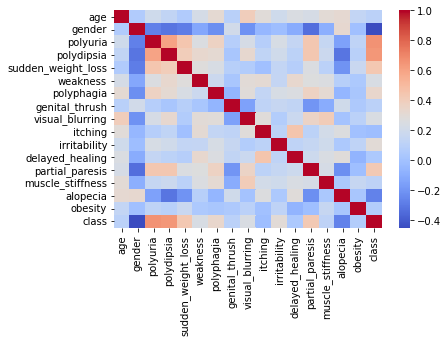

In [ ]:
tc = data.corr()
sns.heatmap(tc,annot = False,cmap="coolwarm")

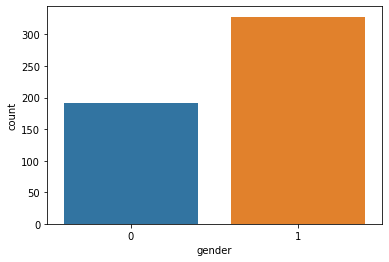

In [ ]:
sns.countplot(x="gender", data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [ ]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 10)
print(x_train)
print(y_train)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
260   33       1         0           1                   0         0   
184   48       0         1           1                   1         0   
172   60       1         1           0                   0         0   
193   36       1         1           0                   0         1   
154   62       1         1           0                   0         1   
..   ...     ...       ...         ...                 ...       ...   
123   47       1         0           1                   0         0   
369   47       1         0           0                   0         0   
320   65       0         0           0                   0         1   
125   55       1         1           1                   1         1   
265   28       0         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
260           0               0                0        0   

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 32, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy" , metrics=["accuracy"])

#Here we train our model.
model.fit(x_train,y_train,epochs = 100,validation_data = (x_test,y_test))
#This the inference phase.We try our model on test data.
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.5)

#With this confusion matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 1.3508 - accuracy: 0.5317 - val_loss: 0.6078 - val_accuracy: 0.6026
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.0329 - accuracy: 0.5452 - val_loss: 0.5850 - val_accuracy: 0.7821
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9495 - accuracy: 0.5566 - val_loss: 0.7994 - val_accuracy: 0.3974
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9222 - accuracy: 0.5362 - val_loss: 0.6131 - val_accuracy: 0.6026
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7613 - accuracy: 0.5950 - val_loss: 0.5933 - val_accuracy: 0.8205
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7408 - accuracy: 0.5928 - val_loss: 0.6109 - val_accuracy: 0.6026
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.6199 - val_loss: 0.6334 - val_accuracy: 0.6026
Epoch 8/100


0.9487179487179487

In [ ]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = conf_mat/counts
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

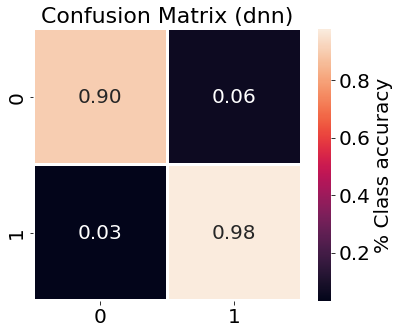

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'dnn')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2176      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.saved_model.save(
    model,
    export_dir = "/tmp/myModel",
)

INFO:tensorflow:Assets written to: /tmp/myModel/assets


In [ ]:
model.save('model.h5')